---

Загружаю необходимые библиотеки

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import math

Я предварительно перевел датасет из формата xlsx в csv, увидел, что там будут столбцы формата дата-время, выношу названия столбцов в отдельный список

In [50]:
date_columns = ['time_order','time_offer','time_assign','time_arrive','trip_time']

Загружаю датасет

In [51]:
df = pd.read_csv('datapark.csv', header=0, parse_dates=date_columns, dayfirst=True)
df.head()

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time
0,10001,0,2024-03-04 00:00:01,2024-03-04 00:00:42,2024-03-04 00:01:13,2024-03-04 00:09:07,2024-03-04 01:27:28
1,10002,0,2024-03-04 00:00:22,2024-03-04 00:01:00,2024-03-04 00:01:14,2024-03-04 00:08:45,2024-03-04 00:22:22
2,10003,1,2024-03-04 00:07:08,2024-03-04 00:07:44,NaT,NaT,NaT
3,10004,1,2024-03-04 00:07:11,2024-03-04 00:08:21,2024-03-04 00:08:46,2024-03-04 00:21:13,2024-03-04 01:23:25
4,10005,0,2024-03-04 00:11:59,2024-03-04 00:12:50,2024-03-04 00:13:09,2024-03-04 00:21:43,2024-03-04 00:46:45


Провожу предварительный анализ данных с целью поиска возможных ошибок:  
    1. Проверяю типы данных в столбцах  
    2. Считаю количество Nan в столбцах  
    3. Проверяю наличие дубликатов в столбце id_order (мог ли один заказ встретиться несколько раз?)  
    4. Проверяю, что столбец test_group действительно содержит только 2 группы   
    5. Проверяю, может ли в данных случиться ошибка, когда после столбца с пустой ячейкой (Nan) встречается столбец с существующим событием (не Nan), то есть имеются пропуски при заполнении данных

In [52]:
# 1. Проверяю типы данных в столбцах  
df.dtypes

id_order                int64
test_group              int64
time_order     datetime64[ns]
time_offer     datetime64[ns]
time_assign    datetime64[ns]
time_arrive    datetime64[ns]
trip_time      datetime64[ns]
dtype: object

In [53]:
# 2. Считаю количество Nan в столбцах  
df.isna().sum()

id_order          0
test_group        0
time_order        0
time_offer     1500
time_assign    2657
time_arrive    4557
trip_time      4897
dtype: int64

In [54]:
# 3. Проверяю наличие дубликатов в столбце id_order (мог ли один заказ встретиться несколько раз?)  
df.id_order.duplicated().sum()

0

In [55]:
# 4. Проверяю, что столбец test_group действительно содержит только 2 группы
df.test_group.unique()

array([0, 1], dtype=int64)

In [56]:
# 5. Проверяю, может ли в данных случиться ошибка, когда после столбца с пустой ячейкой (Nan) 
# встречается столбец с существующим событием (не Nan), то есть имеются пропуски при заполнении данных

mistakes = (df.time_order.isna() & df.time_offer.notna() |
    df.time_offer.isna() & df.time_assign.notna() |
    df.time_assign.isna() & df.time_arrive.notna() |
    df.time_arrive.isna() & df.trip_time.notna())

mistakes.sum()

0

Вывод: ошибок не обнаружено

Приступаю к анализу данных датасета без разделения на группы с целью расчета интересующих показателей и метрик

Хочу выяснить длительность проведения эксперимента

In [57]:
print('Начало ', df.time_order.min(),'\nОкончание', df.time_order.max(),'\nДлительность', df.time_order.max()-df.time_order.min())

Начало  2024-03-04 00:00:01 
Окончание 2024-03-10 23:45:48 
Длительность 6 days 23:45:47


Считаю количество заказов по дням

In [58]:
daily_counts = df.groupby(df.time_order.dt.date).size().reset_index(name='count')
daily_counts.rename(columns={'time_order': 'date'}, inplace=True)
daily_counts

,date,count
0,2024-03-04,1102
1,2024-03-05,1138
2,2024-03-06,1187
3,2024-03-07,1855
4,2024-03-08,3831
5,2024-03-09,1900
6,2024-03-10,1268


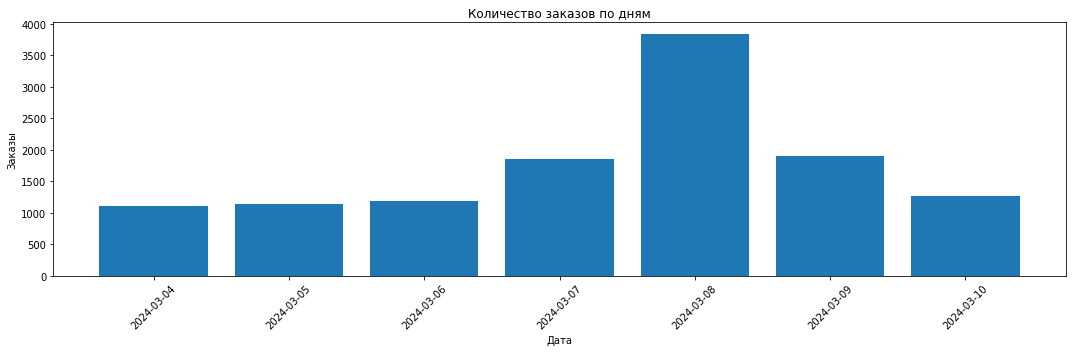

In [59]:
plt.figure(figsize=(15,5))
plt.bar(daily_counts['date'].astype(str), daily_counts['count'])
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.title('Количество заказов по дням')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод: больше всего заказов 3831 пришлось на 2024-03-08, праздничный день

In [60]:
df

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time
0,10001,0,2024-03-04 00:00:01,2024-03-04 00:00:42,2024-03-04 00:01:13,2024-03-04 00:09:07,2024-03-04 01:27:28
1,10002,0,2024-03-04 00:00:22,2024-03-04 00:01:00,2024-03-04 00:01:14,2024-03-04 00:08:45,2024-03-04 00:22:22
2,10003,1,2024-03-04 00:07:08,2024-03-04 00:07:44,NaT,NaT,NaT
3,10004,1,2024-03-04 00:07:11,2024-03-04 00:08:21,2024-03-04 00:08:46,2024-03-04 00:21:13,2024-03-04 01:23:25
4,10005,0,2024-03-04 00:11:59,2024-03-04 00:12:50,2024-03-04 00:13:09,2024-03-04 00:21:43,2024-03-04 00:46:45
...,...,...,...,...,...,...,...
12276,22293,0,2024-03-08 18:45:00,2024-03-08 18:46:21,2024-03-08 18:46:56,NaT,NaT
12277,22294,0,2024-03-08 18:26:51,2024-03-08 18:28:04,2024-03-08 18:28:31,NaT,NaT
12278,22295,1,2024-03-08 18:58:33,2024-03-08 18:59:46,2024-03-08 19:00:23,2024-03-08 19:08:35,2024-03-08 19:22:24
12279,22296,0,2024-03-08 18:47:16,2024-03-08 18:48:49,2024-03-08 18:49:09,2024-03-08 18:53:32,2024-03-08 19:31:03


Я обнаружил странность, что последняя дата заказа в датафрейме не совпадает с датой окончания эксперимента. Сортирую таблицу по времени создания заказа

In [61]:
df.sort_values('time_order')

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time
0,10001,0,2024-03-04 00:00:01,2024-03-04 00:00:42,2024-03-04 00:01:13,2024-03-04 00:09:07,2024-03-04 01:27:28
1,10002,0,2024-03-04 00:00:22,2024-03-04 00:01:00,2024-03-04 00:01:14,2024-03-04 00:08:45,2024-03-04 00:22:22
2,10003,1,2024-03-04 00:07:08,2024-03-04 00:07:44,NaT,NaT,NaT
3,10004,1,2024-03-04 00:07:11,2024-03-04 00:08:21,2024-03-04 00:08:46,2024-03-04 00:21:13,2024-03-04 01:23:25
4,10005,0,2024-03-04 00:11:59,2024-03-04 00:12:50,2024-03-04 00:13:09,2024-03-04 00:21:43,2024-03-04 00:46:45
...,...,...,...,...,...,...,...
11523,21539,0,2024-03-10 23:33:23,2024-03-10 23:33:50,2024-03-10 23:34:18,NaT,NaT
11524,21540,1,2024-03-10 23:38:41,2024-03-10 23:38:57,2024-03-10 23:39:10,2024-03-10 23:44:52,2024-03-11 00:43:37
11525,21541,1,2024-03-10 23:39:40,NaT,NaT,NaT,NaT
11526,21542,1,2024-03-10 23:41:24,2024-03-10 23:42:07,2024-03-10 23:42:40,2024-03-10 23:51:43,2024-03-11 00:05:40


Вывод: номера заказов могут идти не по порядку.  
Хочу выяснить почему так происходит. Расчитываю диапазон имеющихся номеров заказов

In [62]:
print('Номер первого заказа ', df.id_order.min(),'\nНомер последний заказа', df.id_order.max(),'\nРазница', df.id_order.max()-df.id_order.min())

Номер первого заказа  10001 
Номер последний заказа 22297 
Разница 12296


Расчитываю разницу между количеством заказов и диапазоном номеров заказов

In [63]:
abs(df.shape[0]-(df.id_order.max()-df.id_order.min()))

15

Вывод: имеется 15 пропущенных номеров заказов. Скорее всего 15 заказов были удалены из датасета по неизвестной мне причине

Возвращаюсь к проверке порядка заказов. Хочу выяснить сколько заказов нарушают порядок. Для этого считаю разницу между значениями идущими по порядку, между которыми вкрались номера нарушающие порядок

In [64]:
df_sorted = df.sort_values('time_order')

In [65]:
mistakes_indices = set() 
i = 1
while i < len(df_sorted):
    if df_sorted.loc[i, 'time_order'] < df_sorted.loc[i-1, 'time_order']:
        j = i - 1
        while j >= 0 and df_sorted.loc[j, 'time_order'] > df_sorted.loc[i, 'time_order']:
            mistakes_indices.add(j)
            j -= 1
        mistakes_indices.add(i)
    i += 1

In [66]:
df_mistakes = df_sorted.loc[sorted(mistakes_indices)].sort_values(by='time_order').reset_index(drop=True)
df_mistakes

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time
0,22270,1,2024-03-08 18:01:16,2024-03-08 18:02:45,2024-03-08 18:03:20,2024-03-08 18:10:12,2024-03-08 18:53:56
1,22238,1,2024-03-08 18:01:24,2024-03-08 18:02:45,NaT,NaT,NaT
2,17257,0,2024-03-08 18:01:30,2024-03-08 18:02:15,2024-03-08 18:02:37,2024-03-08 18:13:14,2024-03-08 18:34:32
3,22046,1,2024-03-08 18:01:30,2024-03-08 18:02:26,2024-03-08 18:03:06,2024-03-08 18:15:56,2024-03-08 19:14:20
4,17258,1,2024-03-08 18:01:41,2024-03-08 18:02:40,2024-03-09 02:03:00,2024-03-09 02:09:06,2024-03-09 02:40:12
...,...,...,...,...,...,...,...
5018,21539,0,2024-03-10 23:33:23,2024-03-10 23:33:50,2024-03-10 23:34:18,NaT,NaT
5019,21540,1,2024-03-10 23:38:41,2024-03-10 23:38:57,2024-03-10 23:39:10,2024-03-10 23:44:52,2024-03-11 00:43:37
5020,21541,1,2024-03-10 23:39:40,NaT,NaT,NaT,NaT
5021,21542,1,2024-03-10 23:41:24,2024-03-10 23:42:07,2024-03-10 23:42:40,2024-03-10 23:51:43,2024-03-11 00:05:40


Строю агрегирующую таблицу с количеством заказов с неправильным порядковым номером в разрезе по дням-часам

In [67]:
df_mistakes.shape[0]

5023

In [68]:
day_hour = df_mistakes['time_order'].dt.strftime('%Y-%m-%d %H')
df_mistakes_agg = day_hour.value_counts().sort_index().reset_index()
df_mistakes_agg.columns = ['day_hour', 'count']
df_mistakes_agg

,day_hour,count
0,2024-03-08 18,453
1,2024-03-08 19,602
2,2024-03-08 20,480
3,2024-03-08 21,180
4,2024-03-08 22,69
5,2024-03-08 23,71
6,2024-03-09 00,5
7,2024-03-09 01,47
8,2024-03-09 02,26
9,2024-03-09 03,33


In [69]:
fig = px.bar(df_mistakes_agg, x='day_hour', y='count',
                 labels={'day_hour': 'День-Час', 'count': 'Количество событий'},
                 title='Количество событий по дням-часам')

fig.update_layout(width=900, height=600, xaxis={'rangeslider': {'visible': True}})
fig.show()


Вывод: в датасете имеется 5017 заказов из 12281 номера заказов в которых нарушаю возрастающий порядок.   
Проблемы начались 2024-03-08 в 18 часов.   
Пик пришелся на 2024-03-08 19 часов, когда 602 заказа были созданы с нарушающим порядок номерами id.   

С чем связан этот сбой мне неизвестно. Одна из гипотез, что конкретный диапазон номеров мог быть заранее зарезервирован для конкретных целей и начат использован в заданное время. Во всяком случае вся эта информация пока не оказывает никакого влияния на данные для самого экперимента, и остается просто справочной. Возвращаюсь к расчету показателей и метрик

Расчитываю воронку. Возвращаюсь к изначальному датасету, но уже отсортированному не по номеру id, а по time_order

In [70]:
sum_order = df_sorted.time_order.notna().sum()
sum_offer = df_sorted.time_offer.notna().sum()
sum_assign = df_sorted.time_assign.notna().sum()
sum_arrive = df_sorted.time_arrive.notna().sum()
sum_trip = df_sorted.trip_time.notna().sum()

Order2Offer = sum_offer / sum_order
Offer2Assign = sum_assign / sum_offer
Assign2Arrive = sum_arrive / sum_assign
Arrive2Trip = sum_trip / sum_arrive

Order2Trip = sum_trip / sum_order

print('Order2Offer =', round(Order2Offer * 100, 2), '% От создания заказа пользователем до предложения заказа первому водителю', '\n'
    'Offer2Assign =', round(Offer2Assign * 100, 2), '% От предложения заказа первому водителю до принятия заказа водителем ', '\n'
     'Assign2Arrive =', round(Assign2Arrive * 100, 2), '% От принятия заказа водителем до прибытия на точку А', '\n'
     'Arrive2Trip =', round(Arrive2Trip * 100, 2), '% От прибытия на точку А до привоза пассажира в точку B', '\n'
     'Order2Trip =', round(Order2Trip * 100, 2), '% Главная конверсия: от создания заказа пользователя до его выполнения водителем', '\n')

Order2Offer = 87.79 % От создания заказа пользователем до предложения заказа первому водителю 
Offer2Assign = 89.27 % От предложения заказа первому водителю до принятия заказа водителем  
Assign2Arrive = 80.26 % От принятия заказа водителем до прибытия на точку А 
Arrive2Trip = 95.6 % От прибытия на точку А до привоза пассажира в точку B 
Order2Trip = 60.13 % Главная конверсия: от создания заказа пользователя до его выполнения водителем 



Строю графики для воронки заказа и общей конверсии

In [71]:
data = dict(
    step=["Order2Offer", "Offer2Assign", "Assign2Arrive", "Arrive2Trip"],
    CR=[round(Order2Offer * 100, 2), round(Offer2Assign * 100, 2), round(Assign2Arrive * 100, 2), round(Arrive2Trip * 100, 2)])

fig = px.funnel(data, x='CR', y='step', title='Продуктовая воронка, %')
fig.show()

In [72]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=round(Order2Trip * 100, 2), 
    title={'text': "Общая конверсия (Order2Trip) от создания заказа до его выполнения, %"},
    gauge={'axis': {'range': [0,100]}}
))
fig.show()

Следующим пунктом я хочу рассчитать время выполения каждого шага.   
Поскольку мне заранее известно, что в датасете есть заказы с отложенным временем выполнения, то для рассчета средних значений они будут выглядеть как выбросы, но таковыми не являются. Исключать их нельзя.   
Поэтому для расчета времения я буду использовать медианное значение, вместо среднего

Меня интересуют следующие значения:   
1. Order2Offer - время от создания заказа до предложения водителю 
2. Order2Assign - время от создания заказа до принятия заказа водителем  
3. Order2Arrive  - время от созданием заказа до приезда водителя на точку А
4. Order2Trip - время от создания заказа до его выполнения на точке В
5. Offer2Assign - время от предложения заказа водителю до его принятия
6. Assign2Arrive - время от принятия заказа водителем до его приезда на точку А
7. Arrive2Trip - время поездки от точки А до точки В

Рассчитываю значения

In [73]:
Order2Offer = round(((df_sorted.time_offer - df_sorted.time_order).dt.total_seconds() / 60).median(), 1)
Order2Assign = round(((df_sorted.time_assign - df_sorted.time_order).dt.total_seconds() / 60).median(), 1)
Order2Arrive = round(((df_sorted.time_arrive - df_sorted.time_order).dt.total_seconds() / 60).median(), 1)
Order2Trip = round(((df_sorted.trip_time - df_sorted.time_order).dt.total_seconds() / 60).median(), 1)
Offer2Assign = round(((df_sorted.time_assign - df_sorted.time_offer).dt.total_seconds() / 60).median(), 1)
Assign2Arrive = round(((df_sorted.time_arrive - df_sorted.time_assign).dt.total_seconds() / 60).median(), 1)
Arrive2Trip = round(((df_sorted.trip_time - df_sorted.time_arrive).dt.total_seconds() / 60).median(), 1)

Формирую таблицу

In [74]:
step_descriptions = [
    'От создания заказа до предложения водителю',
    'От создания заказа до принятия заказа водителем',
    'От создания заказа до приезда водителя на точку А',
    'От создания заказа до выполнения заказа на точке В',
    'От предложения заказа водителю до его принятия',
    'От принятия заказа водителем до приезда на точку А',
    'Поездка от точки А до точки В']

median_times_df = pd.DataFrame({
    'step': ['Order2Offer', 'Order2Assign', 'Order2Arrive', 'Order2Trip',
             'Offer2Assign', 'Assign2Arrive', 'Arrive2Trip'],
    'median_minutes': [Order2Offer, Order2Assign, Order2Arrive, Order2Trip,
                       Offer2Assign, Assign2Arrive, Arrive2Trip],
    'description': step_descriptions})

pd.set_option('display.max_colwidth', None) 
median_times_df

,step,median_minutes,description
0,Order2Offer,1.2,От создания заказа до предложения водителю
1,Order2Assign,1.7,От создания заказа до принятия заказа водителем
2,Order2Arrive,10.0,От создания заказа до приезда водителя на точку А
3,Order2Trip,62.3,От создания заказа до выполнения заказа на точке В
4,Offer2Assign,0.5,От предложения заказа водителю до его принятия
5,Assign2Arrive,7.9,От принятия заказа водителем до приезда на точку А
6,Arrive2Trip,49.8,Поездка от точки А до точки В


Строю график

In [75]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Order2Offer],
    name='Order2Offer',
    orientation='h',
    text=[f'{Order2Offer}'],       
    textposition='inside',        
    insidetextanchor='middle',     
    hovertemplate=f'Order2Offer Время = {Order2Offer}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Offer2Assign],
    name='Offer2Assign',
    orientation='h',
    text=[f'{Offer2Assign}'],
    textposition='inside',
    insidetextanchor='middle',
    hovertemplate=f'Offer2Assign Время = {Offer2Assign}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Assign2Arrive],
    name='Assign2Arrive',
    orientation='h',
    text=[f'{Assign2Arrive}'],
    textposition='inside',
    insidetextanchor='middle',
    hovertemplate=f'Assign2Arrive Время = {Assign2Arrive}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Arrive2Trip],
    name='Arrive2Trip',
    orientation='h',
    text=[f'{Arrive2Trip}'],
    textposition='inside',
    insidetextanchor='middle',
    hovertemplate=f'Arrive2Trip Время = {Arrive2Trip}<extra></extra>'
))

fig.update_layout(
    barmode='stack',
    legend=dict(traceorder="normal"),  
    title='Этапы выполнения заказа (медианные минуты)',
    xaxis_title='Время (минуты)',
    yaxis_title='',
    height=300,
    width=900
)

fig.show()

In [76]:
median_times_df

,step,median_minutes,description
0,Order2Offer,1.2,От создания заказа до предложения водителю
1,Order2Assign,1.7,От создания заказа до принятия заказа водителем
2,Order2Arrive,10.0,От создания заказа до приезда водителя на точку А
3,Order2Trip,62.3,От создания заказа до выполнения заказа на точке В
4,Offer2Assign,0.5,От предложения заказа водителю до его принятия
5,Assign2Arrive,7.9,От принятия заказа водителем до приезда на точку А
6,Arrive2Trip,49.8,Поездка от точки А до точки В


Имеется небольшой рассхождение данных, сумма всех этапов по отдельности дает 59.4 минуты, а отдельный расчет конверсии 62.3 минуты.  
Вызвано это наличием пустых значений в таблице. Так для отдельного расчета полной конверсии использовались только строки с полными данными, а строки с Nan были исключенны. А вот для расчетов отдельных шагов, где в расчетах использовались только соседнии столбцы наличие Nan в следующих столбац не было важно.

Я закончил анализ данных для изначального датасета:  
1. Проверил данные на наличие ошибок - их не было  
2. Обнаружил отсутсвие некоторых заказов и расхождение в номерах заказ - это не является критичным, и не оказывает влияения на эксперимент
3. Рассчитал продуктовую воронку и конверсию  
4. Рассчитал медианное время для всех этапов воронки

***

## Задание 1. Убедиться, что сплит-система A/B теста работает верно и действительно разбивает выборку в отношении 50 на 50 случайным образом.

Всего в эксперименте участвовало 12281 заказов

In [77]:
df_sorted.shape[0]

12281

Создам отдельные датасеты для каждой группы

In [78]:
df_control = df_sorted.query('test_group == 0')
df_test = df_sorted.query('test_group == 1')

In [79]:
df_control.head()

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time
0,10001,0,2024-03-04 00:00:01,2024-03-04 00:00:42,2024-03-04 00:01:13,2024-03-04 00:09:07,2024-03-04 01:27:28
1,10002,0,2024-03-04 00:00:22,2024-03-04 00:01:00,2024-03-04 00:01:14,2024-03-04 00:08:45,2024-03-04 00:22:22
4,10005,0,2024-03-04 00:11:59,2024-03-04 00:12:50,2024-03-04 00:13:09,2024-03-04 00:21:43,2024-03-04 00:46:45
7,10008,0,2024-03-04 00:39:49,2024-03-04 00:40:24,2024-03-04 00:40:54,2024-03-04 00:42:57,2024-03-04 01:48:37
8,10009,0,2024-03-04 00:44:29,2024-03-04 00:45:33,2024-03-04 00:46:03,2024-03-04 00:47:02,2024-03-04 01:16:10


In [80]:
df_test.head()

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time
2,10003,1,2024-03-04 00:07:08,2024-03-04 00:07:44,NaT,NaT,NaT
3,10004,1,2024-03-04 00:07:11,2024-03-04 00:08:21,2024-03-04 00:08:46,2024-03-04 00:21:13,2024-03-04 01:23:25
5,10006,1,2024-03-04 00:32:12,2024-03-04 00:32:49,2024-03-04 00:33:19,NaT,NaT
6,10007,1,2024-03-04 00:33:56,2024-03-04 00:35:12,2024-03-04 00:35:33,2024-03-04 00:39:06,2024-03-04 01:38:21
9,10010,1,2024-03-04 00:52:33,2024-03-04 00:53:42,2024-03-04 00:54:07,NaT,NaT


Считаю количество участников в каждой группе

In [81]:
df_sorted.groupby('test_group', as_index=False).size()

,test_group,size
0,0,5684
1,1,6597


Выведу размеры групп, и количество завершенных поездок

In [82]:
control_count = df_control.time_order.notna().sum()
test_count = df_test.time_order.notna().sum()
control_end_trip = df_control.trip_time.notna().sum()
test_end_trip = df_test.trip_time.notna().sum()

print('Размер контрольной группы:',control_count,'\nРазмер тестовой группы:',test_count, \
     '\nВыполненных заказов контрольной группы:',control_end_trip,'\nВыполненных заказов тестовой группы:',test_end_trip)

Размер контрольной группы: 5684 
Размер тестовой группы: 6597 
Выполненных заказов контрольной группы: 3562 
Выполненных заказов тестовой группы: 3822


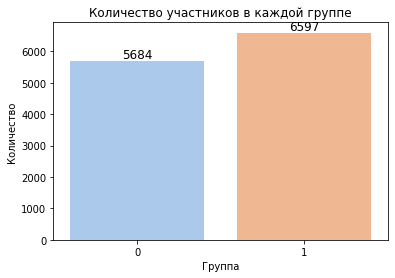

In [83]:
group_counts = df.test_group.value_counts().sort_index()

ax = sns.barplot(x=group_counts.index, y=group_counts.values, palette='pastel')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=12)
plt.xlabel('Группа')
plt.ylabel('Количество')
plt.title('Количество участников в каждой группе')
plt.show()

Рассчитываю математическое ожидание разделения участников по принципу 50 на 50

In [84]:
exp_value = df_sorted.shape[0]/2
exp_value

6140.5

Нахожу процентное отклонение действительного количества участников групп от мат ожидания

In [85]:
actual_counts = df.test_group.value_counts().sort_index()
exp_value_ = pd.Series([len(df_sorted)*0.5]*2, index=[0,1])
percent_diff = ((actual_counts - exp_value) / exp_value) * 100

df_diff = pd.DataFrame({
    'actual': actual_counts,
    'expected': exp_value,
    'diff_percent': percent_diff.round(2)
})
df_diff

,actual,expected,diff_percent
0,5684,6140.5,-7.43
1,6597,6140.5,7.43


Вывод: отклонение количества участников от ожидаемого при разбивке 50 на 50 составляет 7.43%   
Теперь я хочу узнать насколько допустимым является такое отклонение статистикой

Нулевая гипотеза: количество участников в группах не отличается от ожидаемого при условии разделении групп 50% на 50%

Мы имеем дело с биномиальным распределением, использую функцию для расчета дисперсии и стандартного отклонения в наших данных

In [86]:
from scipy.stats import binom, norm

n = len(df_sorted)
p = 0.5

variance = binom.var(n, p)
std_dev = binom.std(n, p)

print('Дисперсия =', variance)
print('Стандартное отклонение =', std_dev)


Дисперсия = 3070.25
Стандартное отклонение = 55.40983667184014


Делаю Z-преобразование, и расчитываю количество отклонение действительных значений от ожидаемого

In [87]:
group0 = df_diff.actual[0]
group1 = df_diff.actual[1]
z0 = (group0 - exp_value) / std_dev
z1 = (group1 - exp_value) / std_dev

print("Z-score (группа 0):", z0)
print("Z-score (группа 1):", z1)


Z-score (группа 0): -8.23860937731293
Z-score (группа 1): 8.23860937731293


Расчет p-value

In [88]:
p_value = 2 * (1 - norm.cdf(abs(z0)))
print("p-value:", p_value)

p-value: 2.220446049250313e-16


In [89]:
z = norm.ppf(1 - 0.05/2)
delta_count = z * std_dev
delta_percent = delta_count / exp_value * 100 

print('Допустимое отклонение количества участников =', delta_count)
print('Допустимое отклонение в процентах =', delta_percent)


Допустимое отклонение количества участников = 108.60128426605341
Допустимое отклонение в процентах = 1.7686065347455975


Построю график распределения

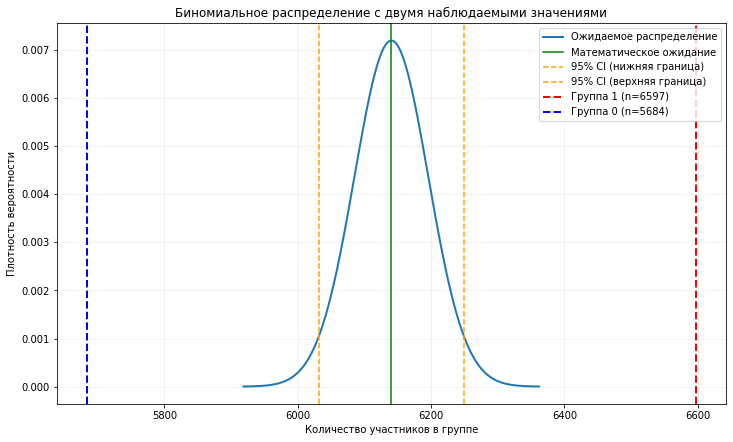

In [90]:
x = np.arange(exp_value - 4*std_dev, exp_value + 4*std_dev, 1)
pdf = norm.pdf(x, loc=exp_value, scale=std_dev)

ci_lower = exp_value - 1.96 * std_dev
ci_upper = exp_value + 1.96 * std_dev


plt.figure(figsize=(12,7))
plt.plot(x, pdf, label='Ожидаемое распределение', linewidth=2)

plt.axvline(exp_value, color='green', linestyle='-', label='Математическое ожидание')

plt.axvline(ci_lower, color='orange', linestyle='--', label='95% CI (нижняя граница)')
plt.axvline(ci_upper, color='orange', linestyle='--', label='95% CI (верхняя граница)')

plt.axvline(group1, color='red', linestyle='--', linewidth=2,
            label=f'Группа 1 (n={group1})')

plt.axvline(group0, color='blue', linestyle='--', linewidth=2,
            label=f'Группа 0 (n={group0})')

plt.xlabel('Количество участников в группе')
plt.ylabel('Плотность вероятности')
plt.title('Биномиальное распределение с двумя наблюдаемыми значениями')
plt.legend()
plt.grid(alpha=0.2)
plt.show()


На графике наглядно видно как далеко находятся значения количества участников групп от ожидаемого

Вывод: отклонение значений от ожидаемого составило +/-8.23 сигм, при допустимых +/-1.96 при альфа=0.95. P-value = 0.0000000000000002.  
Таким образом я отколняю нулевую теорию и принимаю альтернативную.
Вывод: Распределение в группах стат значимо отличается от ожидаемого при распределении 50% на 50%. Отлонение в группах составляет 7.43% при допустмых 1.76%

Хочу выяснить причину неправильного распределения по группам. Построю распределение заказов по дням в разрезе по группам

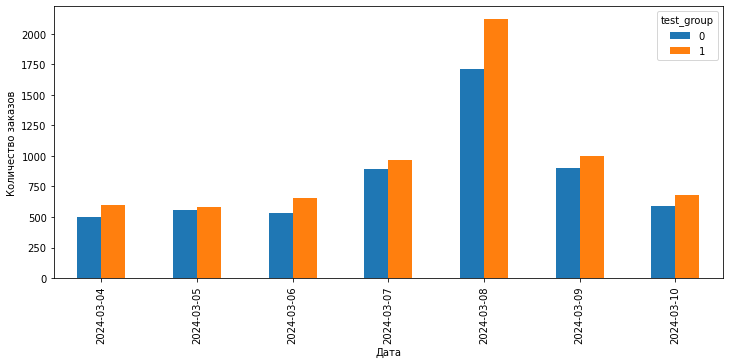

In [91]:
daily = df_sorted.groupby([df['time_order'].dt.date, 'test_group']).size().unstack(fill_value=0)

daily.plot(kind='bar', stacked=False, figsize=(12,5))
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.show()


Как видно на графике перекос наблюдается на протяжении всего эксперимента. Хочу узнать если какая-то зависимость от дня.  
Нулевая гипотеза: распределение участников по группам НЕ зависит от дня недели.

Для проверки этой гипотезы я буду использовать Критерий X-квадрат

In [92]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['time_order'].dt.date, df['test_group'])

# X2-тест 
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi² статистика:", chi2_stat)
print("Степени свободы:", dof)
print("p-value:", p_value)

Chi² статистика: 11.221326697195298
Степени свободы: 6
p-value: 0.08177223105300303


Вывод: Поскольку значение p-value больше 0.05 то я не могу отклонить нулевую гипотезу. Количество участников не зависит от дня недели.

Теперь я хочу выяснить, достаточного ли размера выборка для проведения A/B теста.  
Поскольку размеры групп и конверсия известны, нужно рассчитать минимальный детектируемый эффект (MDE) который может дать размер этих групп, и определить вписываются ли реальные результаты в него

In [93]:
control_count = df_control.time_order.notna().sum()
test_count = df_test.time_order.notna().sum()
control_end_trip = df_control.trip_time.notna().sum()
test_end_trip = df_test.trip_time.notna().sum()

In [94]:
# конверсии
p1 = control_end_trip / control_count  
p2 = test_end_trip / test_count      

# наблюдаемая разница
effect_size_obs = abs(p2 - p1)

# общая концерсия
p_pool = (control_end_trip + test_end_trip) / (control_count + test_count)  # ≈0.6012

# стандартная ошибка
se = np.sqrt(p_pool * (1 - p_pool) * (1/control_count + 1/test_count))

# расчет мощности теста при альфа = 0.05
alpha = 0.05
z_alpha = norm.ppf(1 - alpha/2)
power = 1 - norm.cdf(z_alpha - effect_size_obs / se)

# минимальный детертируемый эффект (MDE) при мощности 0.8
target_power = 0.8
z_beta = norm.ppf(target_power)
mde = (z_alpha + z_beta) * se

print("Наблюдаемая разница конверсий:", round(effect_size_obs, 4))
print("Мощность теста при наблюдаемой разницы:", round(power, 4))
print("Минимальная детектируемая разница (MDE):", round(mde, 4))


Наблюдаемая разница конверсий: 0.0473
Мощность теста при наблюдаемой разницы: 0.9996
Минимальная детектируемая разница (MDE): 0.0248


Вывод: размер выборки достаточен чтобы наблюдаемая разница конверсий была статистически значимой

**Общий вывод по заданию: сплит-система не разбивает группы 50 на 50 случайным образом. Наблюдаемые размеры групп 5684 и 6597 слишком далеки от ожидаемого размера 6140.5. Разница в размерах групп составляет 7.43%, при допустимых 1.76%. Разница в размерах групп не зависит от дня недели. Размер выборки A/B теста досточен для наблюдаемой разницы главной конверсий.**

---


## Задание 2. Рассчитать результаты A/B теста и сделать вывод выгодна ли новая механика

In [95]:
df_control.head()

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time
0,10001,0,2024-03-04 00:00:01,2024-03-04 00:00:42,2024-03-04 00:01:13,2024-03-04 00:09:07,2024-03-04 01:27:28
1,10002,0,2024-03-04 00:00:22,2024-03-04 00:01:00,2024-03-04 00:01:14,2024-03-04 00:08:45,2024-03-04 00:22:22
4,10005,0,2024-03-04 00:11:59,2024-03-04 00:12:50,2024-03-04 00:13:09,2024-03-04 00:21:43,2024-03-04 00:46:45
7,10008,0,2024-03-04 00:39:49,2024-03-04 00:40:24,2024-03-04 00:40:54,2024-03-04 00:42:57,2024-03-04 01:48:37
8,10009,0,2024-03-04 00:44:29,2024-03-04 00:45:33,2024-03-04 00:46:03,2024-03-04 00:47:02,2024-03-04 01:16:10


In [96]:
df_test.head()

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time
2,10003,1,2024-03-04 00:07:08,2024-03-04 00:07:44,NaT,NaT,NaT
3,10004,1,2024-03-04 00:07:11,2024-03-04 00:08:21,2024-03-04 00:08:46,2024-03-04 00:21:13,2024-03-04 01:23:25
5,10006,1,2024-03-04 00:32:12,2024-03-04 00:32:49,2024-03-04 00:33:19,NaT,NaT
6,10007,1,2024-03-04 00:33:56,2024-03-04 00:35:12,2024-03-04 00:35:33,2024-03-04 00:39:06,2024-03-04 01:38:21
9,10010,1,2024-03-04 00:52:33,2024-03-04 00:53:42,2024-03-04 00:54:07,NaT,NaT


In [97]:
df_control.isna().sum()

id_order          0
test_group        0
time_order        0
time_offer      838
time_assign    1399
time_arrive    1995
trip_time      2122
dtype: int64

In [98]:
df_test.isna().sum()

id_order          0
test_group        0
time_order        0
time_offer      662
time_assign    1258
time_arrive    2562
trip_time      2775
dtype: int64

Рассчитаю необходимые метрики и показатели для контрольной группы. 
Буду использовать теже метрики и показатели, что использовал и для общего датасета

In [99]:
sum_order = df_control.time_order.notna().sum()
sum_offer = df_control.time_offer.notna().sum()
sum_assign = df_control.time_assign.notna().sum()
sum_arrive = df_control.time_arrive.notna().sum()
sum_trip = df_control.trip_time.notna().sum()

Order2Offer = sum_offer / sum_order
Offer2Assign = sum_assign / sum_offer
Assign2Arrive = sum_arrive / sum_assign
Arrive2Trip = sum_trip / sum_arrive

Order2Trip = sum_trip / sum_order

print('Order2Offer =', round(Order2Offer * 100, 2), '% От создания заказа пользователем до предложения заказа первому водителю', '\n'
    'Offer2Assign =', round(Offer2Assign * 100, 2), '% От предложения заказа первому водителю до принятия заказа водителем ', '\n'
     'Assign2Arrive =', round(Assign2Arrive * 100, 2), '% От принятия заказа водителем до прибытия на точку А', '\n'
     'Arrive2Trip =', round(Arrive2Trip * 100, 2), '% От прибытия на точку А до привоза пассажира в точку B', '\n'
     'Order2Trip =', round(Order2Trip * 100, 2), '% Главная конверсия: от создания заказа пользователя до его выполнения водителем', '\n')

Order2Offer = 85.26 % От создания заказа пользователем до предложения заказа первому водителю 
Offer2Assign = 88.42 % От предложения заказа первому водителю до принятия заказа водителем  
Assign2Arrive = 86.09 % От принятия заказа водителем до прибытия на точку А 
Arrive2Trip = 96.56 % От прибытия на точку А до привоза пассажира в точку B 
Order2Trip = 62.67 % Главная конверсия: от создания заказа пользователя до его выполнения водителем 



In [100]:
data = dict(
    step=["Order2Offer", "Offer2Assign", "Assign2Arrive", "Arrive2Trip"],
    CR=[round(Order2Offer * 100, 2), round(Offer2Assign * 100, 2), round(Assign2Arrive * 100, 2), round(Arrive2Trip * 100, 2)])

fig = px.funnel(data, x='CR', y='step', title='Продуктовая воронка контрольной группы, %')
fig.show()

In [101]:
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=round(Order2Trip * 100, 2), 
    title={'text': "Общая конверсия (Order2Trip) от создания заказа до его выполнения контрольной группы, %"},
    gauge={'axis': {'range': [0,100]}}
))
fig.show()

In [102]:
Order2Offer = round(((df_control.time_offer - df_control.time_order).dt.total_seconds() / 60).median(), 1)
Order2Assign = round(((df_control.time_assign - df_control.time_order).dt.total_seconds() / 60).median(), 1)
Order2Arrive = round(((df_control.time_arrive - df_control.time_order).dt.total_seconds() / 60).median(), 1)
Order2Trip = round(((df_control.trip_time - df_control.time_order).dt.total_seconds() / 60).median(), 1)
Offer2Assign = round(((df_control.time_assign - df_control.time_offer).dt.total_seconds() / 60).median(), 1)
Assign2Arrive = round(((df_control.time_arrive - df_control.time_assign).dt.total_seconds() / 60).median(), 1)
Arrive2Trip = round(((df_control.trip_time - df_control.time_arrive).dt.total_seconds() / 60).median(), 1)

In [103]:
step_descriptions = [
    'От создания заказа до предложения водителю',
    'От создания заказа до принятия заказа водителем',
    'От создания заказа до приезда водителя на точку А',
    'От создания заказа до выполнения заказа на точке В',
    'От предложения заказа водителю до его принятия',
    'От принятия заказа водителем до приезда на точку А',
    'Поездка от точки А до точки В']

median_times_df = pd.DataFrame({
    'step': ['Order2Offer', 'Order2Assign', 'Order2Arrive', 'Order2Trip',
             'Offer2Assign', 'Assign2Arrive', 'Arrive2Trip'],
    'median_minutes': [Order2Offer, Order2Assign, Order2Arrive, Order2Trip,
                       Offer2Assign, Assign2Arrive, Arrive2Trip],
    'description': step_descriptions})

pd.set_option('display.max_colwidth', None) 
median_times_df

,step,median_minutes,description
0,Order2Offer,1.2,От создания заказа до предложения водителю
1,Order2Assign,1.6,От создания заказа до принятия заказа водителем
2,Order2Arrive,8.4,От создания заказа до приезда водителя на точку А
3,Order2Trip,58.1,От создания заказа до выполнения заказа на точке В
4,Offer2Assign,0.5,От предложения заказа водителю до его принятия
5,Assign2Arrive,6.8,От принятия заказа водителем до приезда на точку А
6,Arrive2Trip,50.0,Поездка от точки А до точки В


In [104]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Order2Offer],
    name='Order2Offer',
    orientation='h',
    text=[f'{Order2Offer}'],       
    textposition='inside',        
    insidetextanchor='middle',     
    hovertemplate=f'Order2Offer Время = {Order2Offer}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Offer2Assign],
    name='Offer2Assign',
    orientation='h',
    text=[f'{Offer2Assign}'],
    textposition='inside',
    insidetextanchor='middle',
    hovertemplate=f'Offer2Assign Время = {Offer2Assign}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Assign2Arrive],
    name='Assign2Arrive',
    orientation='h',
    text=[f'{Assign2Arrive}'],
    textposition='inside',
    insidetextanchor='middle',
    hovertemplate=f'Assign2Arrive Время = {Assign2Arrive}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Arrive2Trip],
    name='Arrive2Trip',
    orientation='h',
    text=[f'{Arrive2Trip}'],
    textposition='inside',
    insidetextanchor='middle',
    hovertemplate=f'Arrive2Trip Время = {Arrive2Trip}<extra></extra>'
))

fig.update_layout(
    barmode='stack',
    legend=dict(traceorder="normal"), 
    title='Этапы выполнения заказа (медианные минуты) контрольной группы',
    xaxis_title='Время (минуты)',
    yaxis_title='',
    height=300,
    width=900
)

fig.show()

Рассчитаю необходимые метрики и показатели для тестовой группы

In [105]:
sum_order = df_test.time_order.notna().sum()
sum_offer = df_test.time_offer.notna().sum()
sum_assign = df_test.time_assign.notna().sum()
sum_arrive = df_test.time_arrive.notna().sum()
sum_trip = df_test.trip_time.notna().sum()

Order2Offer = sum_offer / sum_order
Offer2Assign = sum_assign / sum_offer
Assign2Arrive = sum_arrive / sum_assign
Arrive2Trip = sum_trip / sum_arrive

Order2Trip = sum_trip / sum_order

print('Order2Offer =', round(Order2Offer * 100, 2), '% От создания заказа пользователем до предложения заказа первому водителю', '\n'
    'Offer2Assign =', round(Offer2Assign * 100, 2), '% От предложения заказа первому водителю до принятия заказа водителем ', '\n'
     'Assign2Arrive =', round(Assign2Arrive * 100, 2), '% От принятия заказа водителем до прибытия на точку А', '\n'
     'Arrive2Trip =', round(Arrive2Trip * 100, 2), '% От прибытия на точку А до привоза пассажира в точку B', '\n'
     'Order2Trip =', round(Order2Trip * 100, 2), '% Главная конверсия: от создания заказа пользователя до его выполнения водителем', '\n')

Order2Offer = 89.97 % От создания заказа пользователем до предложения заказа первому водителю 
Offer2Assign = 89.96 % От предложения заказа первому водителю до принятия заказа водителем  
Assign2Arrive = 75.58 % От принятия заказа водителем до прибытия на точку А 
Arrive2Trip = 94.72 % От прибытия на точку А до привоза пассажира в точку B 
Order2Trip = 57.94 % Главная конверсия: от создания заказа пользователя до его выполнения водителем 



In [106]:
data = dict(
    step=["Order2Offer", "Offer2Assign", "Assign2Arrive", "Arrive2Trip"],
    CR=[round(Order2Offer * 100, 2), round(Offer2Assign * 100, 2), round(Assign2Arrive * 100, 2), round(Arrive2Trip * 100, 2)])

fig = px.funnel(data, x='CR', y='step', title='Продуктовая воронка тестовой группы, %')
fig.show()

In [107]:
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=round(Order2Trip * 100, 2), 
    title={'text': "Общая конверсия (Order2Trip) от создания заказа до его выполнения тестовой группы, %"},
    gauge={'axis': {'range': [0,100]}}
))
fig.show()

In [108]:
Order2Offer = round(((df_test.time_offer - df_test.time_order).dt.total_seconds() / 60).median(), 1)
Order2Assign = round(((df_test.time_assign - df_test.time_order).dt.total_seconds() / 60).median(), 1)
Order2Arrive = round(((df_test.time_arrive - df_test.time_order).dt.total_seconds() / 60).median(), 1)
Order2Trip = round(((df_test.trip_time - df_test.time_order).dt.total_seconds() / 60).median(), 1)
Offer2Assign = round(((df_test.time_assign - df_test.time_offer).dt.total_seconds() / 60).median(), 1)
Assign2Arrive = round(((df_test.time_arrive - df_test.time_assign).dt.total_seconds() / 60).median(), 1)
Arrive2Trip = round(((df_test.trip_time - df_test.time_arrive).dt.total_seconds() / 60).median(), 1)

In [109]:
step_descriptions = [
    'От создания заказа до предложения водителю',
    'От создания заказа до принятия заказа водителем',
    'От создания заказа до приезда водителя на точку А',
    'От создания заказа до выполнения заказа на точке В',
    'От предложения заказа водителю до его принятия',
    'От принятия заказа водителем до приезда на точку А',
    'Поездка от точки А до точки В']

median_times_df = pd.DataFrame({
    'step': ['Order2Offer', 'Order2Assign', 'Order2Arrive', 'Order2Trip',
             'Offer2Assign', 'Assign2Arrive', 'Arrive2Trip'],
    'median_minutes': [Order2Offer, Order2Assign, Order2Arrive, Order2Trip,
                       Offer2Assign, Assign2Arrive, Arrive2Trip],
    'description': step_descriptions})

pd.set_option('display.max_colwidth', None) 
median_times_df

,step,median_minutes,description
0,Order2Offer,1.2,От создания заказа до предложения водителю
1,Order2Assign,1.8,От создания заказа до принятия заказа водителем
2,Order2Arrive,11.7,От создания заказа до приезда водителя на точку А
3,Order2Trip,67.1,От создания заказа до выполнения заказа на точке В
4,Offer2Assign,0.5,От предложения заказа водителю до его принятия
5,Assign2Arrive,9.0,От принятия заказа водителем до приезда на точку А
6,Arrive2Trip,49.5,Поездка от точки А до точки В


In [110]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Order2Offer],
    name='Order2Offer',
    orientation='h',
    text=[f'{Order2Offer}'],       
    textposition='inside',        
    insidetextanchor='middle',     
    hovertemplate=f'Order2Offer Время = {Order2Offer}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Offer2Assign],
    name='Offer2Assign',
    orientation='h',
    text=[f'{Offer2Assign}'],
    textposition='inside',
    insidetextanchor='middle',
    hovertemplate=f'Offer2Assign Время = {Offer2Assign}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Assign2Arrive],
    name='Assign2Arrive',
    orientation='h',
    text=[f'{Assign2Arrive}'],
    textposition='inside',
    insidetextanchor='middle',
    hovertemplate=f'Assign2Arrive Время = {Assign2Arrive}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=['Заказ'],
    x=[Arrive2Trip],
    name='Arrive2Trip',
    orientation='h',
    text=[f'{Arrive2Trip}'],
    textposition='inside',
    insidetextanchor='middle',
    hovertemplate=f'Arrive2Trip Время = {Arrive2Trip}<extra></extra>'
))

fig.update_layout(
    barmode='stack',
    legend=dict(traceorder="normal"), 
    title='Этапы выполнения заказа (медианные минуты) тестовой группы',
    xaxis_title='Время (минуты)',
    yaxis_title='',
    height=300,
    width=900
)

fig.show()

Приступаю к расчету статистики главной конверсии. Для контрольной группы она 62.7, для тестовой 57.9  
Нулевая гипотеза: конверсии в группах не отличаются

Выведу надостающие показатели. Мне известны проценты конверсии для каждой группы, но неизвестны абсолютные величины

In [111]:
control_end_trip = df_control.trip_time.notna().sum()
control_end_trip

3562

In [112]:
test_end_trip = df_test.trip_time.notna().sum()
test_end_trip

3822

Приступаю к растчету статистики, проведу z-test

In [113]:
from math import sqrt


p_control = control_end_trip / control_count
p_test = test_end_trip / test_count

p_pool = (control_end_trip + test_end_trip) / (control_count + test_count)

se = sqrt(p_pool * (1 - p_pool) * (1/control_count + 1/test_count))

z = (p_test - p_control) / se

p_value = 2 * (1 - norm.cdf(abs(z)))

print('Z-score = ',z)
print('p-value = ',p_value)


Z-score =  -5.339793019802076
p-value =  9.305275727733431e-08


Вывод: значение p-value значительно меньше 0.05, поэтому я отклоняю нулевую гипотезу о равенстве конверсий. Конверсии статически значимо отличаются, конверсия в контрольной группе больше чем в тестовой. 

Я заметил, что в воронке тестовой группы сильно просел шаг конверсии Assign2Arrive = 75.58 % От принятия заказа водителем до прибытия на точку А.  
Почти 25% клиентов в тестовой группе не дожидаются своего водителя на точке А, против 14% в контрольной группе. 
Поскольку механизмы назначения водителей на заказы неизвестны пассажиру, я пропущу эти этапы, и сравню время от оформелния заказа до подачи машины в двух группах, метрика Order2Arrive. Её время составляет 11.7 минут для тестовой группы, и 8.4 минуты для контольной. Я хочу выяснить является ли разница этих значений статистически значимой в нашем эксперименте.

Сначала создам новый столбец Order2Arrive_time, где рассчитаю значения Order2Arrive_time в минутах

In [114]:
df_control['Order2Arrive_time'] = (df_control.time_arrive - df_control.time_order).dt.total_seconds() / 60
df_test['Order2Arrive_time'] = (df_test.time_arrive - df_test.time_order).dt.total_seconds() / 60


c:\users\igor\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\igor\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Избавлюсь от строк с пустыми значениями которые не должны участвовать в статистике

In [115]:
df_control_ = df_control.dropna(subset=['Order2Arrive_time'])
df_test_ = df_test.dropna(subset=['Order2Arrive_time'])

In [116]:
df_control_.head()

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time,Order2Arrive_time
0,10001,0,2024-03-04 00:00:01,2024-03-04 00:00:42,2024-03-04 00:01:13,2024-03-04 00:09:07,2024-03-04 01:27:28,9.100000
1,10002,0,2024-03-04 00:00:22,2024-03-04 00:01:00,2024-03-04 00:01:14,2024-03-04 00:08:45,2024-03-04 00:22:22,8.383333
4,10005,0,2024-03-04 00:11:59,2024-03-04 00:12:50,2024-03-04 00:13:09,2024-03-04 00:21:43,2024-03-04 00:46:45,9.733333
7,10008,0,2024-03-04 00:39:49,2024-03-04 00:40:24,2024-03-04 00:40:54,2024-03-04 00:42:57,2024-03-04 01:48:37,3.133333
8,10009,0,2024-03-04 00:44:29,2024-03-04 00:45:33,2024-03-04 00:46:03,2024-03-04 00:47:02,2024-03-04 01:16:10,2.550000


In [117]:
df_test_.head()

,id_order,test_group,time_order,time_offer,time_assign,time_arrive,trip_time,Order2Arrive_time
3,10004,1,2024-03-04 00:07:11,2024-03-04 00:08:21,2024-03-04 00:08:46,2024-03-04 00:21:13,2024-03-04 01:23:25,14.033333
6,10007,1,2024-03-04 00:33:56,2024-03-04 00:35:12,2024-03-04 00:35:33,2024-03-04 00:39:06,2024-03-04 01:38:21,5.166667
16,10017,1,2024-03-04 01:23:26,2024-03-04 01:24:14,2024-03-04 01:24:46,2024-03-04 01:32:07,2024-03-04 01:55:23,8.683333
21,10022,1,2024-03-04 01:30:27,2024-03-04 01:31:16,2024-03-04 07:31:56,2024-03-04 07:45:02,2024-03-04 08:21:07,374.583333
28,10029,1,2024-03-04 02:04:50,2024-03-04 02:05:31,2024-03-04 02:06:06,2024-03-04 02:13:16,2024-03-04 03:40:03,8.433333


Теперь я имею стобцы для расчета статитистика. Хочу выяснить является ли распределение нормальным.   
Буду использовать тест Шапиро-Уилка

In [118]:
from scipy.stats import shapiro

stat_c, p_c = shapiro(df_control_.Order2Arrive_time)

print('Контрольная группа: s=',stat_c,'p=', p_c)

stat_t, p_t = shapiro(df_test_.Order2Arrive_time)

print('Тестовая группа: s=',stat_t,'p=', p_t)


Контрольная группа: s= 0.9712931513786316 p= 1.392041209685299e-26
Тестовая группа: s= 0.4218960404396057 p= 0.0


Вывод: распределения в обеих группах не являются нормальными

Теперь проведу тест на равенство дисперсий, буду использовать тест Левена

In [119]:
from scipy.stats import levene

stat_var, p_var = levene(df_control_.Order2Arrive_time, df_test_.Order2Arrive_time)

print('Сравнения групп: s=',stat_var,'p-value=', p_var)

Сравнения групп: s= 497.07628436589613 p-value= 9.109459148011491e-107


Вывод: дисперсии в группах разные

Для вычисления статистики здесь не подойдет t-test, как по причине ненормальности распределений и неравенстве дисперсий, но в первую очередь потому-что он применяется к средним значениям, а мы сравниваем медианы.  
Поэтому я буду использовать непараметрический критерий Манна-Уитни
Нулевая гипотеза: медианы в двух группах не отличаются

In [120]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(df_control_['Order2Arrive_time'],
                              df_test_['Order2Arrive_time'],
                              alternative='two-sided')

print('Статистика: stat=', stat,'p-value=', p_value)


Статистика: stat= 4066218.0 p-value= 1.0761199567378797e-260


Вывод: p-value горазд меньше 0.05 поэтому я отколняю нулевую гипотезу, и принимаю альтернативную. Медианы в группах статистически значимо отлчиются.

**Решение задания: данные A/B теста показали, что результаты тестовой группы хуже результатов контрольной группы. Все расчеты были статистически значимо обоснованы.  
Конверсия в контрольной группе составила 62.7%, а в тестовой 57.9%. В тестовой группе конверсия упала на 4.8%, а время ожидания подачи машины увеличилось на 29%, что увеличило количество не выполненных заказов. 
Вывод: новая механика ухудшила показатели**

---

# Задание 3. Предложить способ автоматически определять отложенные заказы и изучить их воздействие на A/B тест

Мой способ определения отложенных заказов: по историческим данным найти две области распределения времени ожидания подачи машины. Поскольку у пассажиров есть некая верхняя граница ожидания в минутах, дольше которой они не готовы ожидать машину для срочных заказов, то все, что выше этой границы можно будет считать отложенными заказами.

Нахожу разницу между созданием заказа и подачей машины на точку А, и округляю до минут

In [121]:
df_sorted['Order2Arrive_time'] = round((df_sorted.time_arrive - df_sorted.time_order).dt.total_seconds() / 60, 0)

Агрегирую данные по минутам потраченным на ожидания, и хочу рассмотреть первые 60 минут. По уже ранее проведенным иследованиям, мы знаем, что среднее время подачи машины составляет 10 минут.

In [122]:
df_wait = df_sorted.groupby('Order2Arrive_time', dropna=True).agg(count=('Order2Arrive_time', 'count')).head(60)
df_wait

,count
Order2Arrive_time,
2.0,84
3.0,205
4.0,365
5.0,478
6.0,590
7.0,605
8.0,629
9.0,610
10.0,623


Построю график

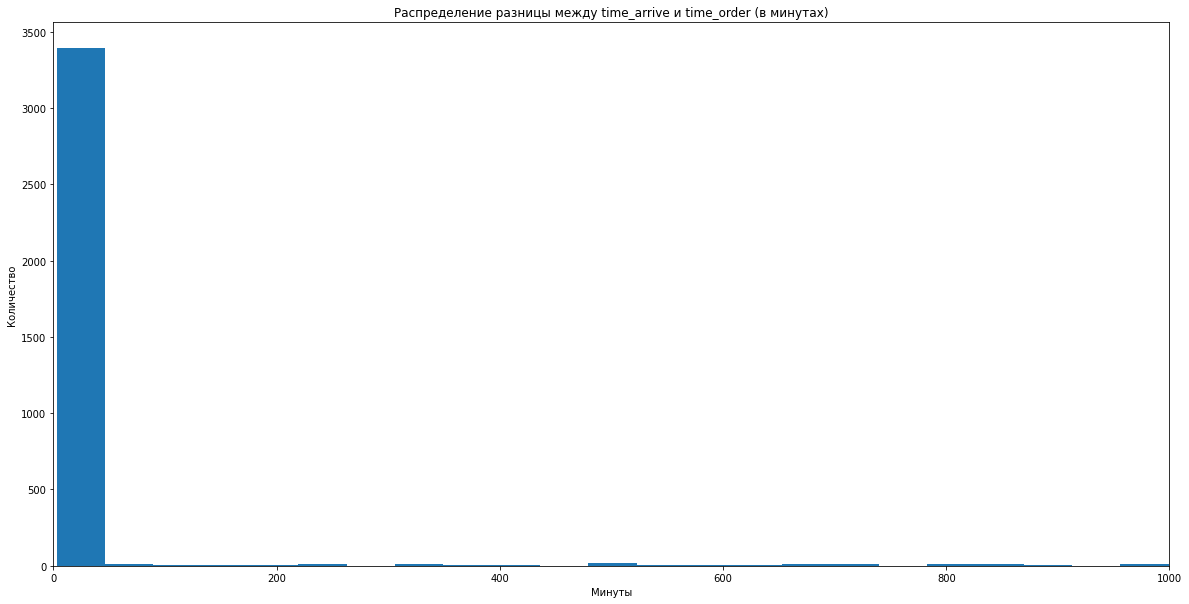

In [123]:
plt.figure(figsize=(20, 10))
plt.hist(df_test["Order2Arrive_time"].dropna(), bins=100)
plt.xlim(0, 1000)
plt.xlabel("Минуты")
plt.ylabel("Количество")
plt.title("Распределение разницы между time_arrive и time_order (в минутах)")
plt.show()

Рассмотрю только область в пределах 60 минут

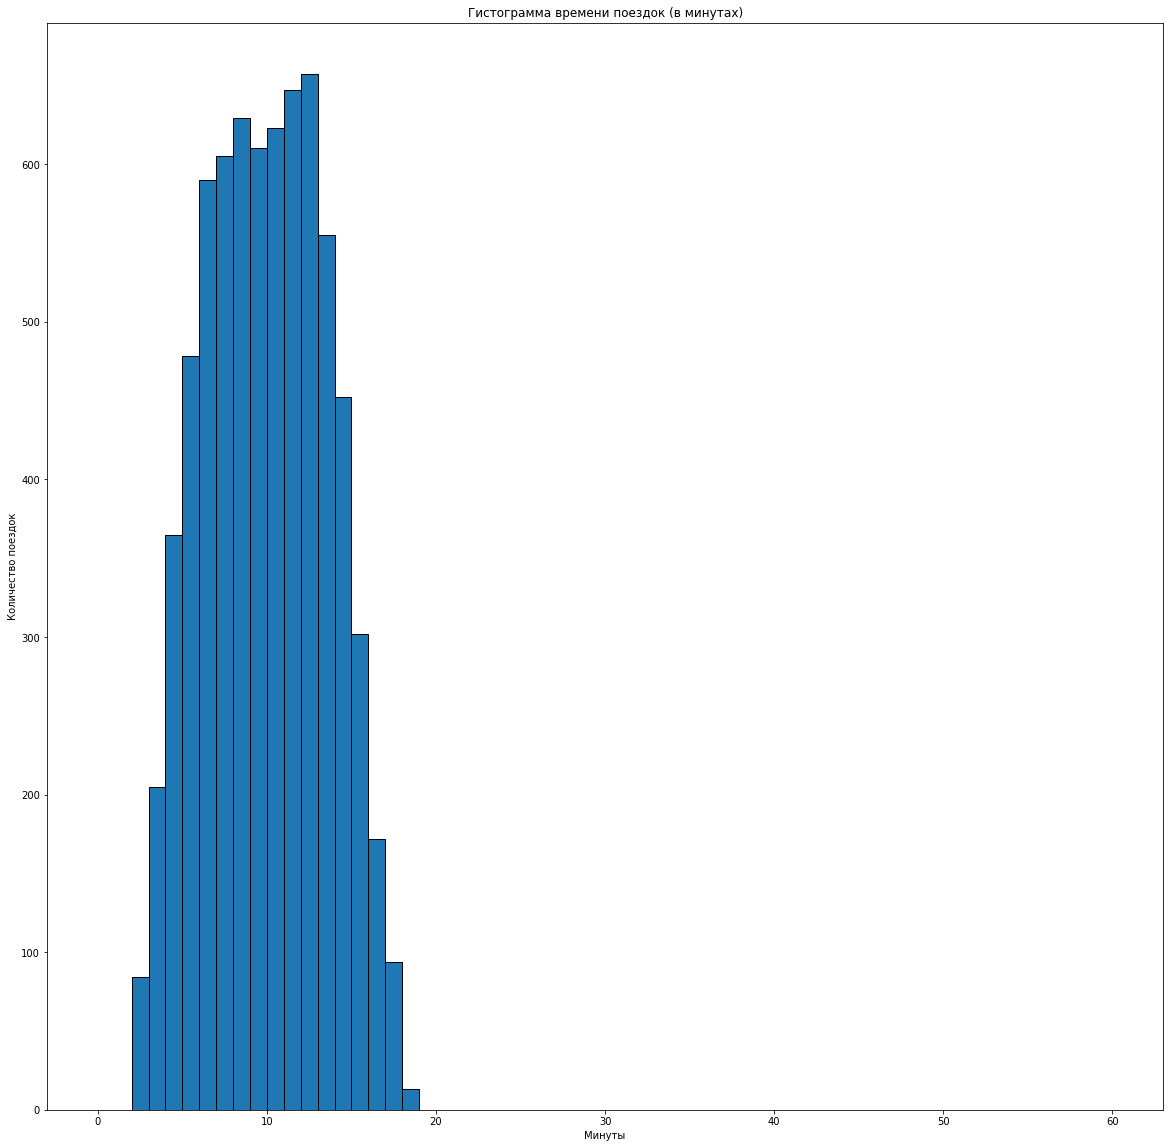

In [124]:
minutes_60 = df_sorted['Order2Arrive_time']
minutes_60 = minutes_60[minutes_60 < 60]
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.hist(minutes_60, bins=range(0, 61), edgecolor='black')
plt.xlabel('Минуты')
plt.ylabel('Количество поездок')
plt.title('Гистограмма времени поездок (в минутах)')
plt.show()


Вывод: данные таблицы и графика показывают, что имеется очевидный разрыв во времени ожидания между срочными заказами и отложенными. По имеющимся данным верхняя граница ожидания для срочных составляет 19 минут, а нижняя для отложенных 67 минут

**Решение задания: на основе имеющихся исторических данных отложенными заказами считать те заказы разница времени в которых между созданием заказа и подачей машины на точку А составляет более 19 минут**